In [104]:
!pip install xgboost


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [106]:
df = pd.read_csv("D:\DSBDA Theory and Lab\Assignments\Assignment 5\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [107]:
df = pd.get_dummies(df, columns=['Gender'])    # One-Hot Encoding 'Gender' categorical field
y = df['Purchased']
X = df.drop(['Purchased', 'User ID'], axis=1)
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


# Train-Test Split the Dataset 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# CLassification Model - Random Forest

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9

# Classification Model - XGBoost (Gradient Boosting)

In [110]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9

Since both models are giving the same accuracy score, we can use either one

In [111]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[67,  7],
       [ 5, 41]], dtype=int64)

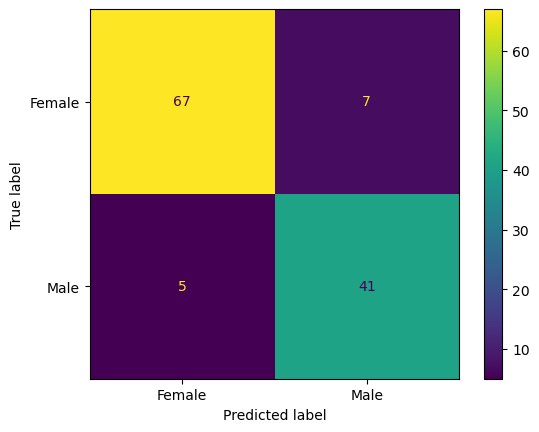

In [112]:
ConfusionMatrixDisplay(cm, display_labels=['Female', 'Male']).plot()


In [113]:
TP, TN, FP, FN = cm[0, 0], cm[1, 1], cm[1, 0], cm[0, 1]

pos = TP + FP
neg = TN + FN

# Precision
P = TP / (TP + FP)

# Recall
R = TP / (TP + FN)

# Accuracy
A = (TP + TN) / (TP + TN + FP + FN) 

# F1-Score
F1 = (2*P*R) / (P + R)

# error rate
error_rate = (FP + FN) / (pos + neg)

print(f"Precision: {P}")
print(f"Recall: {R}")
print(f"Accuracy: {A}")
print(f"F1-Score: {F1}")
print(f"Error Rate: {error_rate}")


Precision: 0.9305555555555556
Recall: 0.9054054054054054
Accuracy: 0.9
F1-Score: 0.9178082191780821
Error Rate: 0.1


# Classification Model - Gaussian Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [115]:
X = df
y = pd.DataFrame(iris.target, columns=['target name'])
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [117]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy_score(y_test, y_pred)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333

In [120]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0,  9,  1],
       [ 0,  2, 17]], dtype=int64)

In [124]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

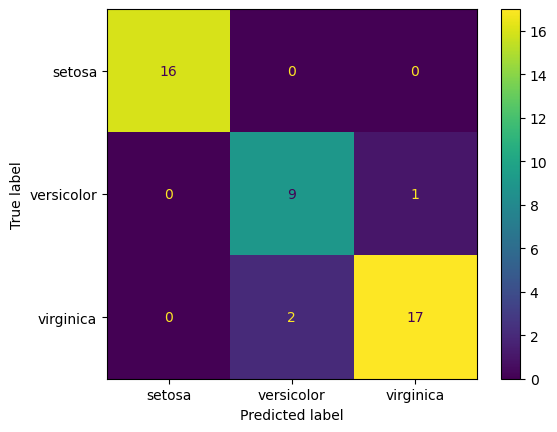

In [125]:
ConfusionMatrixDisplay(cm, display_labels=['setosa', 'versicolor', 'virginica']).plot()
